In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
ls

CCPP_data.csv  Untitled


# **Data source:**

Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615.

Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)

# **Problem Statement**
In this project we will build a model to predict the electrical energy output of a
Combined Cycle Power Plant
, which uses a combination of gas turbines, steam turbines, and heat recovery steam generators to generate power.  We have a set of 9568 hourly average ambient environmental readings from sensors at the power plant which we will use in our model.



# **Step 1: Load and Explore the Dataset**

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/CCPP_data.csv'
pp_data = pd.read_csv(file_path, encoding='latin')

# Print the shape of the dataset before deleting duplicate values
print('Shape before deleting duplicate values:', pp_data.shape)

# Remove duplicate rows if any
pp_data = pp_data.drop_duplicates()

# Print the shape of the dataset after deleting duplicate values
print('Shape after deleting duplicate values:', pp_data.shape)

# Print the first 10 rows of the dataset to observe the data
print(pp_data.head(10))

# Additional checks
# Print summary statistics of the dataset
print(pp_data.describe())

# Print column names and data types
print(pp_data.info())


Shape before deleting duplicate values: (9568, 5)
Shape after deleting duplicate values: (9527, 5)
   ï»¿AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
5  26.27  59.44  1012.23  58.77  443.67
6  15.89  43.96  1014.02  75.24  467.35
7   9.48  44.71  1019.12  66.43  478.42
8  14.64  45.00  1021.78  41.25  475.98
9  11.74  43.56  1015.14  70.72  477.50
             ï»¿AT            V           AP           RH          PE
count  9527.000000  9527.000000  9527.000000  9527.000000  9527.00000
mean     19.658225    54.293421  1013.237084    73.334951   454.33591
std       7.444397    12.686309     5.940526    14.607513    17.03908
min       1.810000    25.360000   992.890000    25.560000   420.26000
25%      13.530000    41.740000  1009.085000    63.375000   439.75000
50%      20.350000    52.080000  1012.920

# **Step 2: Data Preprocessing**

In [5]:
# Check for missing values
print(pp_data.isnull().sum())

# If there are missing values, handle them (example shown below, if any)
# pp_data = pp_data.dropna()  # Option 1: Drop rows with missing values
# pp_data.fillna(pp_data.mean(), inplace=True)  # Option 2: Fill missing values with column mean

# Data looks clean, so no further preprocessing is necessary at this step


ï»¿AT    0
V        0
AP       0
RH       0
PE       0
dtype: int64


# **Step 3: Feature Selection**

In [13]:
# Check the current column names
print(pp_data.columns)

Index(['ï»¿AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


In [14]:
# Features and target variable
X = pp_data[['ï»¿AT', 'AP', 'RH', 'V']]  # Independent variables
y = pp_data['PE']  # Dependent variable (target)


# **Step 4: Train-Test Split**

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 5: Model Selection and Validation**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize the models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# Cross-validation for Linear Regression
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print("Linear Regression CV RMSE:", -lr_cv_scores.mean())

# Cross-validation for Random Forest Regressor
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print("Random Forest Regressor CV RMSE:", -rf_cv_scores.mean())


Linear Regression CV RMSE: 4.553393498363066
Random Forest Regressor CV RMSE: 3.4023426616916757


# **Step 6: Final Model Training and Evaluation**

Test Set RMSE: 3.450793528997987


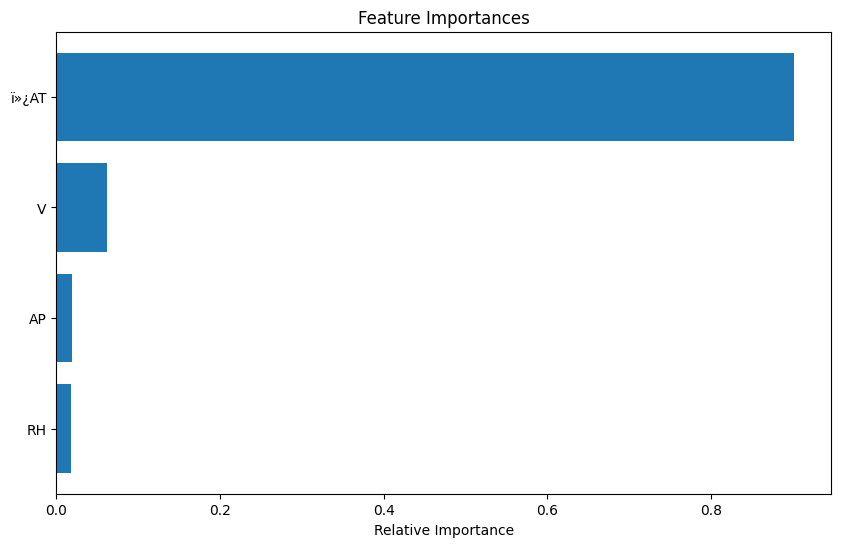

In [18]:
from sklearn.metrics import mean_squared_error

# Train the final model on the entire training set
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the final model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test Set RMSE:", rmse)

# Plotting feature importances
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
